#### EDA

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('hotel_bookings.csv')
data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

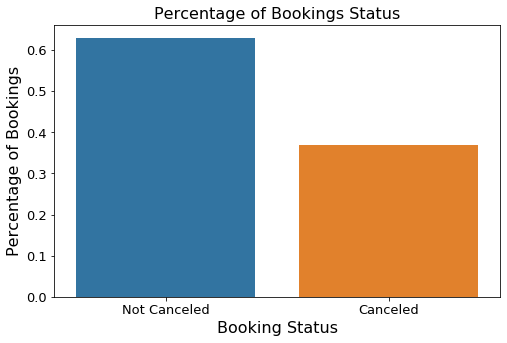

In [5]:
font = {'color':  'black',
        'weight': 'normal',
        'size': 16
        
        }
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Bookings Status", fontdict=font)
sns.barplot(x=data['is_canceled'].unique(), y=data['is_canceled'].value_counts(normalize=True))
plt.xlabel("Booking Status", fontdict=font)
plt.ylabel("Percentage of Bookings", fontdict=font)
plt.yticks(fontsize=13)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'],fontsize=13);

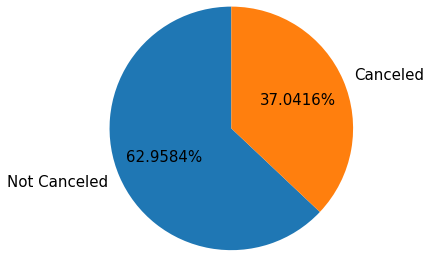

In [6]:
fig1, ax1 = plt.subplots()
ax1.pie(data['is_canceled'].value_counts(normalize=True),labels=['Not Canceled', 'Canceled'], autopct='%0.4f%%',
         startangle=90,radius = 1.4,textprops = {"fontsize":15}) 
plt.show()

In [7]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(data)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

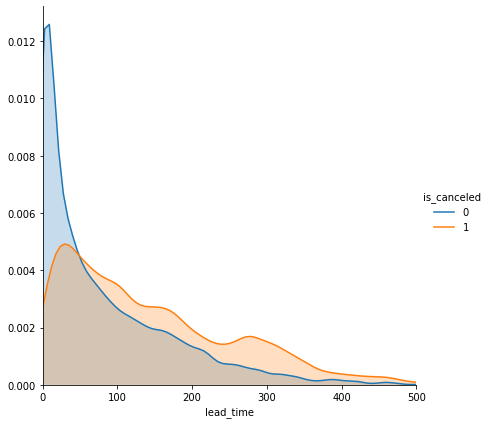

In [8]:
(sns.FacetGrid(data, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

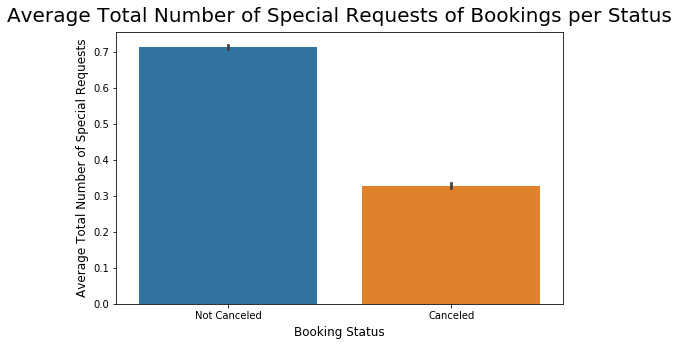

In [114]:
# Visualizing the total number of special requests for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Total Number of Special Requests of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['total_of_special_requests'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Total Number of Special Requests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);


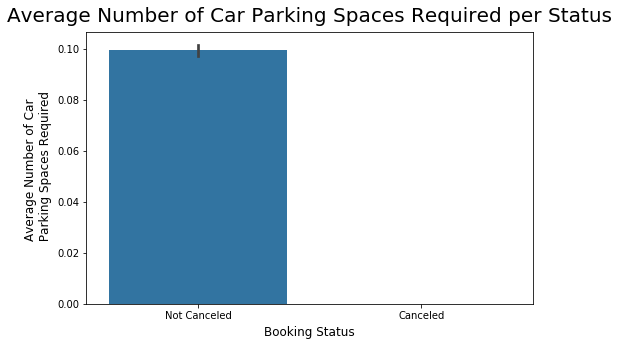

In [116]:
# Visualizing the total number of requested parking spaces for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Car Parking Spaces Required per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['required_car_parking_spaces'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

In [3]:
df =data.drop('reservation_status',axis=1)
df['is_canceled']=df['is_canceled'].replace([0,1],["no","yes"])
#Extracting categorical feature columns
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))
df_cat=df[cat_cols]
df_cat.columns

Index(['is_canceled', 'distribution_channel', 'country', 'arrival_date_month',
       'customer_type', 'meal', 'market_segment', 'assigned_room_type',
       'hotel', 'reserved_room_type', 'deposit_type',
       'reservation_status_date'],
      dtype='object')

In [108]:
df = data
df['is_canceled']=df['is_canceled'].replace([0,1],["no","yes"])
#Extracting categorical feature columns
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))
df_cat=df[cat_cols]
df_cat.columns

Index(['market_segment', 'deposit_type', 'country', 'meal',
       'assigned_room_type', 'distribution_channel', 'reserved_room_type',
       'is_canceled', 'arrival_date_month', 'reservation_status_date',
       'reservation_status', 'hotel', 'customer_type'],
      dtype='object')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


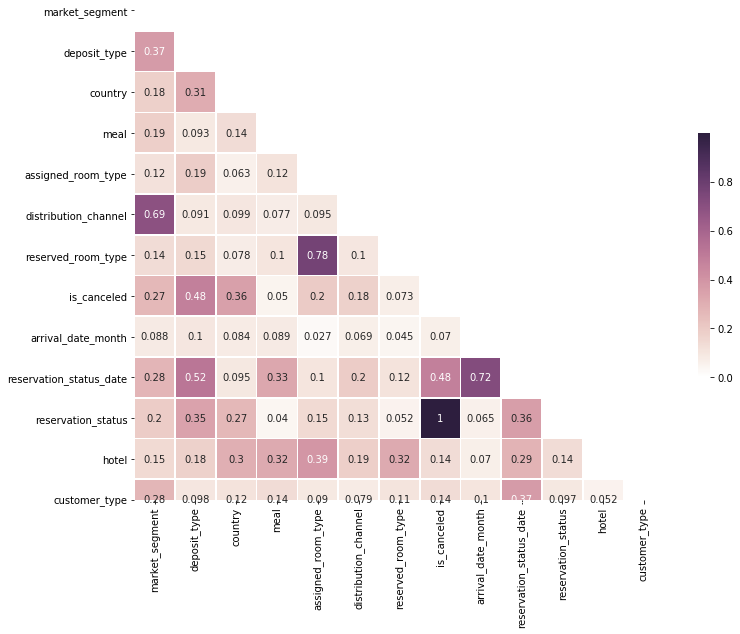

In [117]:
import itertools
import scipy

def cramers_corrected_stat(confusion_matrix):
    """
    Calculates the corrected Cramer's V statistic
    
    Args:
        confusion_matrix: The confusion matrix of the variables to calculate the statistic on
    
    Returns:
        The corrected Cramer's V statistic
    """
    
    #chi2, _, _, _ = scipy.stats.chi2_contingency(confusion_matrix)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

#Getting the list of columns in the dataframe
cols = list(df_cat.columns.values)

#Creating an empty array to append to as we will go through iteratations to calculate correlations of every combination of variables.
emp_arr = np.zeros((len(cols),len(cols)))

#Iteraiting dataframe using itertools
#itertools.combinations() : Given an array of size n, generate and print all possible combinations of r elements in array.
for col1, col2 in itertools.combinations(cols, 2):
    A, B = df_cat[col1], df_cat[col2]
    idx1, idx2 = cols.index(col1), cols.index(col2)
    conf_mat = pd.crosstab(A,B) 
    #appending results to emp_array
    emp_arr[idx1, idx2] = cramers_corrected_stat(conf_mat.values)
    emp_arr[idx2, idx1] = emp_arr[idx1, idx2]

#creating a correlation matrix
corr = pd.DataFrame(emp_arr, index=cols, columns=cols)

# Mask to get lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Draw the heatmap with the mask 
fig = plt.figure(figsize=(12, 9))

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.7,cbar_kws={"shrink": .5}, annot=True)

plt.show()

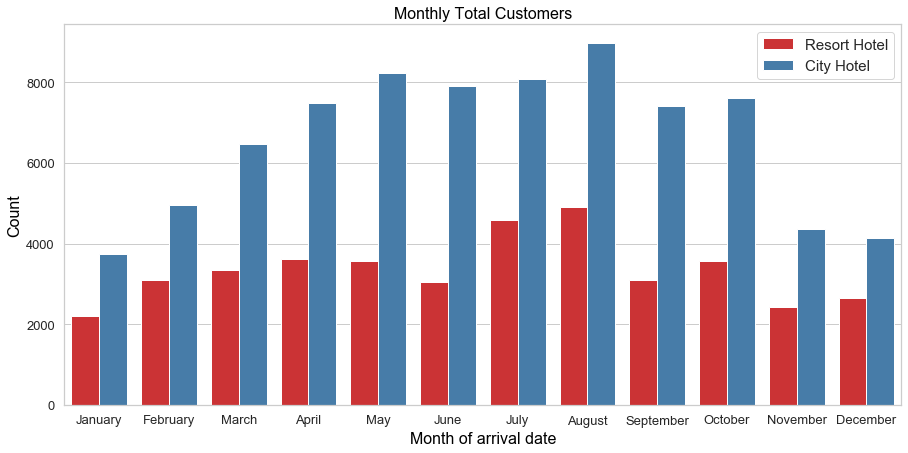

In [250]:
font = {'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
data["arrival_date_month"] = pd.Categorical(data["arrival_date_month"], categories=ordered_months, ordered=True)
plt.figure(figsize =(15,7))
sns.set(style="whitegrid")
plt.title("Monthly Total Customers",fontdict=font)
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data, palette = "Set1")
plt.xlabel('Month of arrival date',fontdict=font)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Count',fontdict=font)
plt.legend(loc=1, prop={'size': 15})

#### People are more likely to choose City hotel than Resort Hotel (why???). Price? Deposit? Meal?
#### May-August busiest time.

In [251]:
cancel_data1 = pd.DataFrame(data.loc[(data["is_canceled"] == 1) & (data["hotel"] == "Resort Hotel")]["arrival_date_month"].value_counts())
cancel_data1.rename(columns = {'arrival_date_month':'count'}, inplace = True)
cancel_data1["Hotel_type"] = 'Resort Hotel'
cancel_data1["total"] = res_book_per_month
cancel_data1["percentage_cancel"] = cancel_data1["count"] / cancel_data1["total"] *100
cancel_data1["percentage_nocancel"] = 100 - cancel_data1["count"] / cancel_data1["total"] *100
cancel_data1

count    Hotel_type  total  percentage_cancel  percentage_nocancel
August      1637  Resort Hotel   4894          33.449121            66.550879
July        1436  Resort Hotel   4573          31.401706            68.598294
April       1059  Resort Hotel   3609          29.343308            70.656692
May         1024  Resort Hotel   3559          28.772127            71.227873
June        1007  Resort Hotel   3045          33.070608            66.929392
September   1006  Resort Hotel   3108          32.368082            67.631918
October      978  Resort Hotel   3555          27.510549            72.489451
February     795  Resort Hotel   3103          25.620367            74.379633
March        763  Resort Hotel   3336          22.871703            77.128297
December     631  Resort Hotel   2648          23.829305            76.170695
November     461  Resort Hotel   2437          18.916701            81.083299
January      325  Resort Hotel   2193          14.819881            85.180119

In [252]:
cty_book_per_month = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_book_per_month
cancel_data2 = pd.DataFrame(data.loc[(data["is_canceled"] == 1) & (data["hotel"] == "City Hotel")]["arrival_date_month"].value_counts())
cancel_data2.rename(columns = {'arrival_date_month':'count'}, inplace = True)
cancel_data2["Hotel_type"] = 'City Hotel'
cancel_data2["total"] = cty_book_per_month
cancel_data2["percentage_cancel"] = cancel_data2["count"] / cancel_data2["total"] *100
cancel_data2["percentage_nocancel"] = 100 - cancel_data2["count"] / cancel_data2["total"] *100
cancel_data2

count  Hotel_type  total  percentage_cancel  percentage_nocancel
May         3653  City Hotel   8232          44.375607            55.624393
August      3602  City Hotel   8983          40.097963            59.902037
June        3528  City Hotel   7894          44.692171            55.307829
April       3465  City Hotel   7480          46.323529            53.676471
July        3306  City Hotel   8088          40.875371            59.124629
October     3268  City Hotel   7605          42.971729            57.028271
September   3110  City Hotel   7400          42.027027            57.972973
March       2386  City Hotel   6458          36.946423            63.053577
February    1901  City Hotel   4965          38.288016            61.711984
December    1740  City Hotel   4132          42.110358            57.889642
November    1661  City Hotel   4357          38.122561            61.877439
January     1482  City Hotel   3736          39.668094            60.331906

In [254]:
# result = pd.concat([cancel_data1,cancel_data2],axis=1)
# result

In [256]:
# result.reset_index(inplace=True)
# result.rename(columns = {'index':'Month'}, inplace = True)
# ordered_months = ["January", "February", "March", "April", "May", "June", 
  #        "July", "August", "September", "October", "November", "December"]
#result["Month"] = pd.Categorical(result["Month"], categories=ordered_months, ordered=True)
#result

In [242]:
#fig, ax = plt.subplots(figsize=(12,7))
#plt.figure(figsize =(20,10))

#ax.bar(result["Month"], result['percentage_cancel'], label='Cancel')
#ax.bar(result["Month"], result['percentage_nocancel'], bottom = result['percentage_cancel_r'],
#       label='No_Cancel')

#ax.set_ylabel('Percentage')
#ax.set_title('Cancelation Percentage by Month and Hotel Type')
#ax.legend()
#plt.xticks(fontsize=13)
#plt.yticks(fontsize=13)
#plt.show()

In [243]:
result2 = pd.concat([cancel_data1,cancel_data2])
result2.reset_index(inplace=True)
result2.rename(columns = {'index':'Month'}, inplace = True)
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
result2

Month  count    Hotel_type  total  percentage_cancel  \
0      August   1637  Resort Hotel   4894          33.449121   
1        July   1436  Resort Hotel   4573          31.401706   
2       April   1059  Resort Hotel   3609          29.343308   
3         May   1024  Resort Hotel   3559          28.772127   
4        June   1007  Resort Hotel   3045          33.070608   
5   September   1006  Resort Hotel   3108          32.368082   
6     October    978  Resort Hotel   3555          27.510549   
7    February    795  Resort Hotel   3103          25.620367   
8       March    763  Resort Hotel   3336          22.871703   
9    December    631  Resort Hotel   2648          23.829305   
10   November    461  Resort Hotel   2437          18.916701   
11    January    325  Resort Hotel   2193          14.819881   
12        May   3653    City Hotel   8232          44.375607   
13     August   3602    City Hotel   8983          40.097963   
14       June   3528    City Hotel   7894          44.692171   
15      April   3465    City Hotel   7480          46.323529   
16       July   3306    City Hotel   8088          40.875371   
17    October   3268    City Hotel   7605          42.971729   
18  September   3110    City Hotel   7400          42.027027   
19      March   2386    City Hotel   6458          36.946423   
20   February   1901    City Hotel   4965          38.288016   
21   December   1740    City Hotel   4132          42.110358   
22   November   1661    City Hotel   4357          38.122561   
23    January   1482    City Hotel   3736          39.668094   

    percentage_nocancel  
0             66.550879  
1             68.598294  
2             70.656692  
3             71.227873  
4             66.929392  
5             67.631918  
6             72.489451  
7             74.379633  
8             77.128297  
9             76.170695  
10            81.083299  
11            85.180119  
12            55.624393  
13            59.902037  
14            55.307829  
15            53.676471  
16            59.124629  
17            57.028271  
18            57.972973  
19            63.053577  
20            61.711984  
21            57.889642  
22            61.877439  
23            60.331906

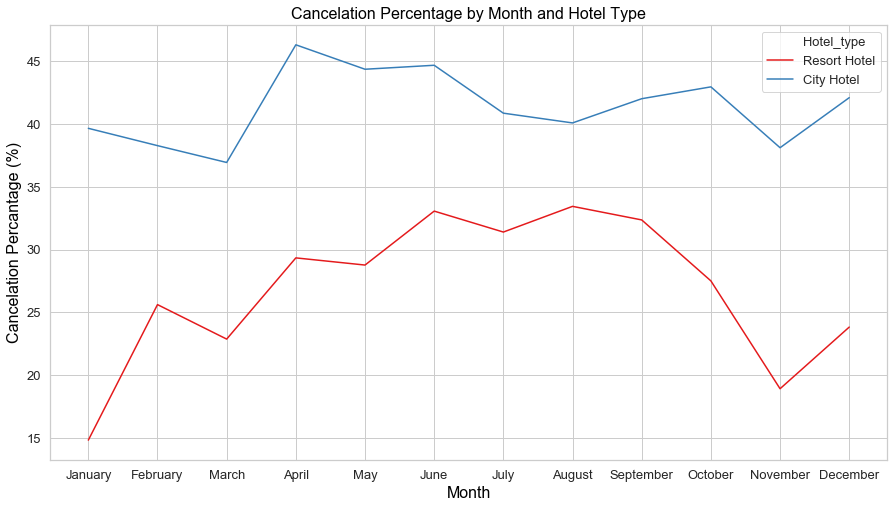

In [248]:
# barplot with standard deviation:
plt.figure(figsize=(15, 8))
sns.lineplot( x = "Month", y="percentage_cancel", hue="Hotel_type", data=result2, 
            hue_order = ["Resort Hotel", "City Hotel"],palette = "Set1")
plt.title("Cancelation Percentage by Month and Hotel Type", fontdict=font)
plt.xlabel("Month", fontdict=font)
plt.ylabel("Cancelation Percantage (%)", fontdict=font)
plt.legend(loc=1, prop={'size': 13})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### Although more people choose city hotel, the cancelation rate is much higher than city hotel. Why? What can we do to help city hotel reduce their concelation rate?
#### Firstly, let's compare the rom price for both hotel types.

In [262]:
data1 = data[data['is_canceled'] == 0]

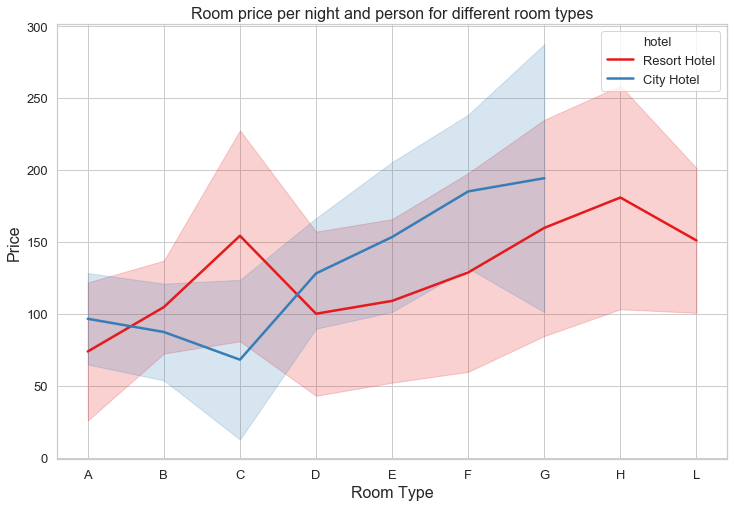

In [274]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "reserved_room_type", y="adr", hue="hotel", data=data1, 
            hue_order = ["Resort Hotel","City Hotel"], palette = "Set1", ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person for different room types", fontsize=16)
plt.xlabel("Room Type", fontsize=16)
plt.legend(loc=1, prop={'size': 13})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Price", fontsize=16)
plt.show()

#### The price of city hotel is higer than resort hotel except type B and C.  That's maybe one reason. 

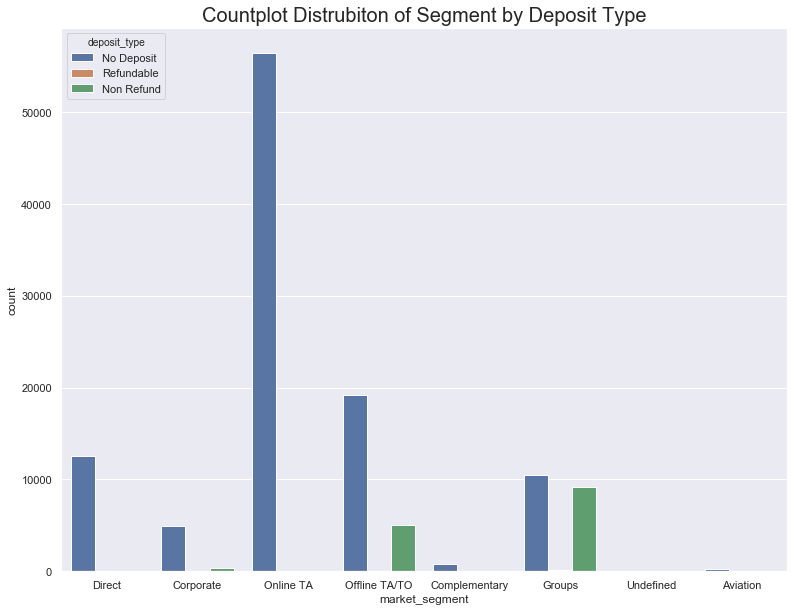

In [276]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = data)

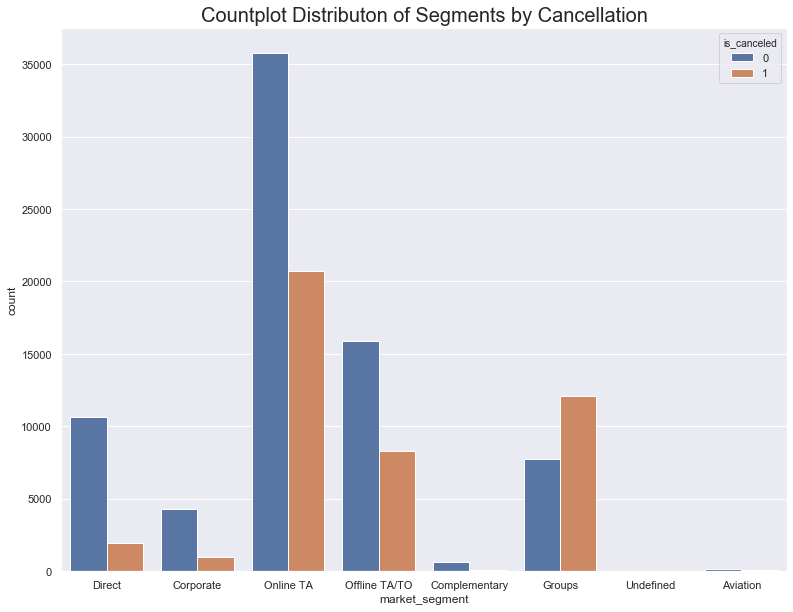

In [277]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = data)

In [353]:
b = pd.DataFrame()
for i in data["deposit_type"].unique():
    a = pd.DataFrame(data.loc[(data["is_canceled"] == 1) & (data["deposit_type"] == i)]["market_segment"].value_counts())
    a.rename(columns = {'market_segment':'count'}, inplace = True)
    a["Deposit_type"] = i
    a.reset_index(inplace=True)
    a.rename(columns = {'index':'market_segment'}, inplace = True)
    b = pd.concat([a, b])
print (b)   

  market_segment  count Deposit_type
0         Groups   9110   Non Refund
1  Offline TA/TO   5003   Non Refund
2      Corporate    312   Non Refund
3      Online TA     53   Non Refund
4         Direct     16   Non Refund
0      Online TA     18   Refundable
1         Groups     13   Refundable
2         Direct      2   Refundable
3  Offline TA/TO      2   Refundable
4      Corporate      1   Refundable
0      Online TA  20668   No Deposit
1  Offline TA/TO   3306   No Deposit
2         Groups   2974   No Deposit
3         Direct   1916   No Deposit
4      Corporate    679   No Deposit
5  Complementary     97   No Deposit
6       Aviation     52   No Deposit
7      Undefined      2   No Deposit


In [354]:
c = pd.DataFrame()
for i in data["deposit_type"].unique():
    a = pd.DataFrame(data.loc[(data["is_canceled"] == 0) & (data["deposit_type"] == i)]["market_segment"].value_counts())
    a.rename(columns = {'market_segment':'count'}, inplace = True)
    a["Deposit_type"] = i
    a.reset_index(inplace=True)
    a.rename(columns = {'index':'market_segment'}, inplace = True)
    c = pd.concat([a, c])
print (c)   

  market_segment  count Deposit_type
0         Groups     62   Non Refund
1      Corporate     22   Non Refund
2         Direct      3   Non Refund
3  Offline TA/TO      3   Non Refund
4      Online TA      3   Non Refund
0         Groups    117   Refundable
1         Direct      4   Refundable
2      Corporate      3   Refundable
3  Offline TA/TO      2   Refundable
0      Online TA  35735   No Deposit
1  Offline TA/TO  15903   No Deposit
2         Direct  10665   No Deposit
3         Groups   7535   No Deposit
4      Corporate   4278   No Deposit
5  Complementary    646   No Deposit
6       Aviation    185   No Deposit


In [357]:
result = pd.merge(b, c,how="left", on=["market_segment", "Deposit_type"])
result["total"] = result["count_x"] + result["count_y"]
result["Cancel_percentage"] = result["count_x"]/result["total"]
result

market_segment  count_x Deposit_type  count_y    total  Cancel_percentage
0          Groups     9110   Non Refund     62.0   9172.0           0.993240
1   Offline TA/TO     5003   Non Refund      3.0   5006.0           0.999401
2       Corporate      312   Non Refund     22.0    334.0           0.934132
3       Online TA       53   Non Refund      3.0     56.0           0.946429
4          Direct       16   Non Refund      3.0     19.0           0.842105
5       Online TA       18   Refundable      NaN      NaN                NaN
6          Groups       13   Refundable    117.0    130.0           0.100000
7          Direct        2   Refundable      4.0      6.0           0.333333
8   Offline TA/TO        2   Refundable      2.0      4.0           0.500000
9       Corporate        1   Refundable      3.0      4.0           0.250000
10      Online TA    20668   No Deposit  35735.0  56403.0           0.366434
11  Offline TA/TO     3306   No Deposit  15903.0  19209.0           0.172107
12         Groups     2974   No Deposit   7535.0  10509.0           0.282996
13         Direct     1916   No Deposit  10665.0  12581.0           0.152293
14      Corporate      679   No Deposit   4278.0   4957.0           0.136978
15  Complementary       97   No Deposit    646.0    743.0           0.130552
16       Aviation       52   No Deposit    185.0    237.0           0.219409
17      Undefined        2   No Deposit      NaN      NaN                NaN

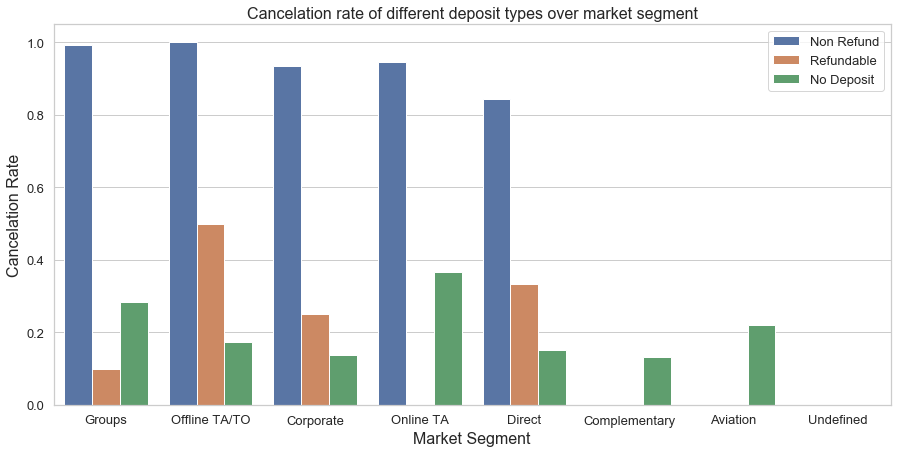

In [368]:
plt.figure(figsize = (15,7))
sns.set(style="whitegrid")
sns.barplot(x = 'market_segment', y = 'Cancel_percentage', hue = 'Deposit_type', data = result);
plt.title("Cancelation rate of different deposit types over market segment", fontsize=16)
plt.xlabel("Market Segment", fontsize=16)
plt.legend(loc=1, prop={'size': 13})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Cancelation Rate", fontsize=16)
plt.show()

### Model

In [142]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
df = pd.read_csv('cleaned_data.csv')

In [143]:
df

hotel  is_canceled  lead_time  arrival_date_month  \
0           0            0        342                   7   
1           0            0        737                   7   
2           0            0          7                   7   
3           0            0         13                   7   
4           0            0         14                   7   
...       ...          ...        ...                 ...   
118211      1            0         23                   8   
118212      1            0        102                   8   
118213      1            0         34                   8   
118214      1            0        109                   8   
118215      1            0        205                   8   

        arrival_date_week_number  stays_in_weekend_nights  \
0                             27                        0   
1                             27                        0   
2                             27                        0   
3                             27                        0   
4                             27                        0   
...                          ...                      ...   
118211                        35                        2   
118212                        35                        2   
118213                        35                        2   
118214                        35                        2   
118215                        35                        2   

        stays_in_week_nights  adults  children  babies  ...  \
0                          0       2         0       0  ...   
1                          0       2         0       0  ...   
2                          1       1         0       0  ...   
3                          1       1         0       0  ...   
4                          2       2         0       0  ...   
...                      ...     ...       ...     ...  ...   
118211                     5       2         0       0  ...   
118212                     5       3         0       0  ...   
118213                     5       2         0       0  ...   
118214                     5       2         0       0  ...   
118215                     7       2         0       0  ...   

        distribution_channel  is_repeated_guest  previous_cancellations  \
0                          0                  0                       0   
1                          0                  0                       0   
2                          0                  0                       0   
3                          1                  0                       0   
4                          2                  0                       0   
...                      ...                ...                     ...   
118211                     2                  0                       0   
118212                     2                  0                       0   
118213                     2                  0                       0   
118214                     2                  0                       0   
118215                     2                  0                       0   

        previous_bookings_not_canceled  reserved_room_type  deposit_type  \
0                                    0                   2             0   
1                                    0                   2             0   
2                                    0                   0             0   
3                                    0                   0             0   
4                                    0                   0             0   
...                                ...                 ...           ...   
118211                               0                   0             0   
118212                               0                   4             0   
118213                               0                   3             0   
118214                               0                   0             0   
118215                               0          

In [144]:
df.shape
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc

In [145]:
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [146]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((94572, 21), (23644, 21), (94572,), (23644,))

In [147]:
def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

### Decision Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
# Construct Grid Parameters
dt_params = {
    'max_depth':[None],
    'max_features' : np.linspace(0,1,11),
    'min_samples_split': range(20,30), 
    'min_samples_leaf': range(1,5)
}

# Perform Grid Search
dt_gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                 dt_params,
                 cv = 5,
                 scoring = 'accuracy')
dt = dt_gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 2200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_featu

In [149]:
dt_gs.best_params_,dt_gs.best_score_

({'max_depth': None,
  'max_features': 0.6000000000000001,
  'min_samples_leaf': 4,
  'min_samples_split': 28},
 0.8219452383929251)

In [10]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

GridSearchCV is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search. It does a exhaustive generation of combination of different parameters passed. Using cross validation score, Grid Search returns the combination of hyperparameters for which the model is performing the best.

In [150]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.181789 to fit



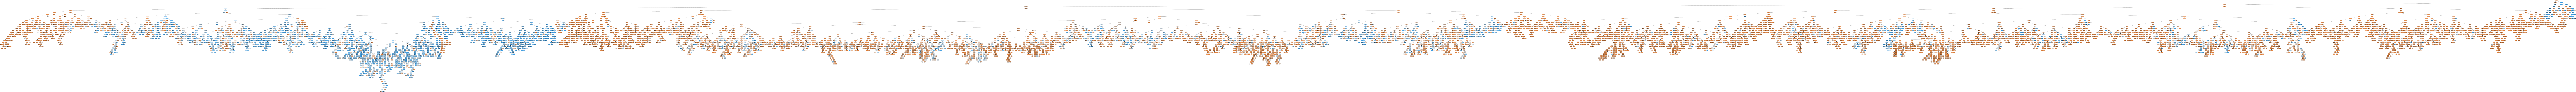

In [151]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(dt_gs.best_estimator_ , rounded = True, filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [152]:
text_representation = tree.export_text(dt_gs.best_estimator_)
print(text_representation)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_16 <= 1.50
|   |--- feature_13 <= 0.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- feature_20 <= 0.50
|   |   |   |   |--- feature_1 <= 8.50
|   |   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |   |--- feature_4 <= 3.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_15 <= 6.50
|   |   |   |   |   |   |   |   |   |   |--- feature_18 <= 123.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- feature_18 >  123.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |--- feature_15 >  6.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_18 <= 74.97
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 6.50
|  

In [153]:
y_prob = dt_gs.predict_proba(X_test)[:,1]

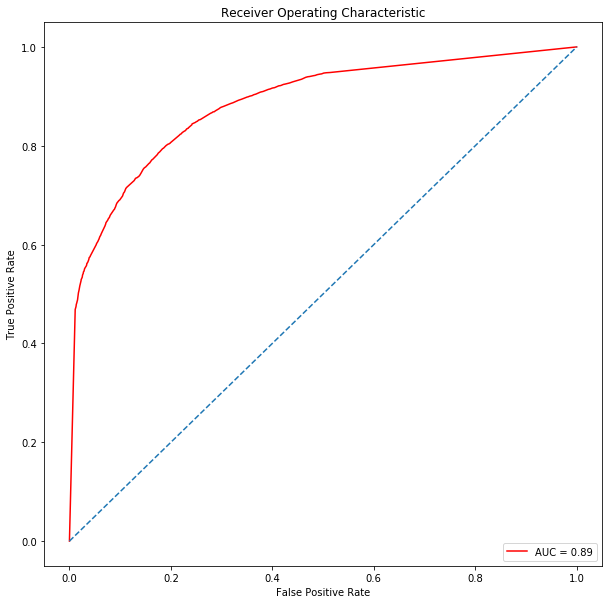

In [154]:
ROC(y_test, y_prob)

In [155]:
# Scoring 
print(f'Best Training Accuracy: {dt.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {dt.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(dt.best_estimator_, X, y, cv=StratifiedKFold(shuffle=True)).mean()}')

Best Training Accuracy: 0.8768874508311129
Best Testing Accuracy: 0.8235916088648283
Cross-val-score: 0.8235010317038096


In [156]:
y_pred = dt_gs.predict(X_test)

In [157]:
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

Accuracy Score: 0.8235916088648283

Confusion Matrix:
 [[13200  1681]
 [ 2490  6273]]


### Neural network

In [221]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from numpy import loadtxt

In [220]:
df = pd.read_csv('cleaned_data_1.csv')
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [180]:
X.shape

(118216, 21)

In [222]:
# Scaling the data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [231]:
# Initialize the constructor
model = Sequential()
model = Sequential()

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Choose whatever number of layers/neurons you want.
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.18))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))

#model.add(Dense(19, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [232]:
history = model.fit(x=X_train_sc, 
          y=y_train, 
          epochs=200,
          batch_size = 256,
          validation_data=(X_test_sc, y_test), verbose=0,
          callbacks=[early_stop]
          )

Epoch 51: early stopping


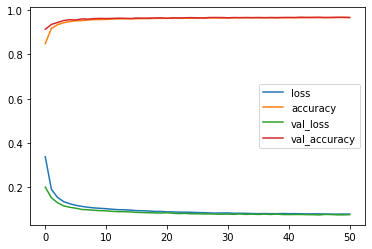

In [233]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

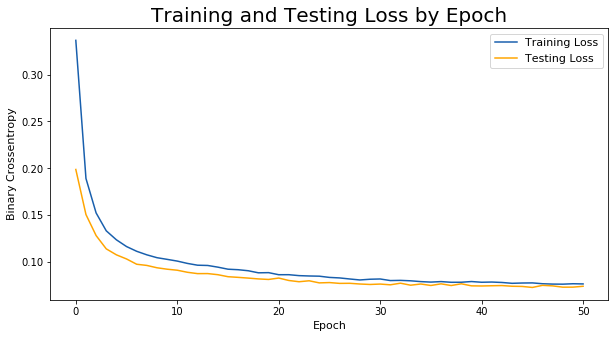

In [234]:
train_loss = model.history.history['loss']
test_loss = model.history.history['val_loss']

# Visualizing our training and testing loss by epoch
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
plt.title('Training and Testing Loss by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 11)
plt.ylabel('Binary Crossentropy', fontsize = 11)
plt.legend(fontsize = 11);

# Credit to GA CNN global lecture author for the graph code 

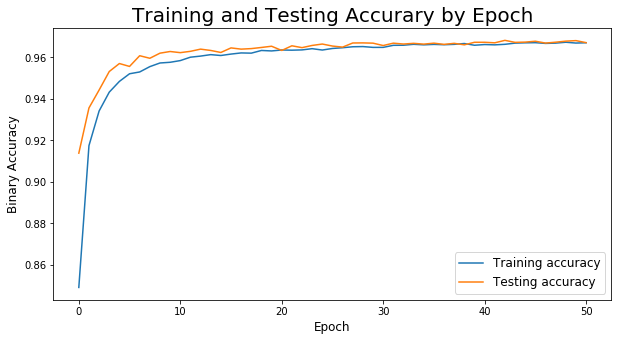

In [235]:
# Visualizing our training and testing accuracy by epoch:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Testing accuracy')
plt.title('Training and Testing Accurary by Epoch', fontsize = 20)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Binary Accuracy', fontsize = 12)
plt.legend(fontsize = 12);

In [236]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = (model.predict(X_test_sc) > 0.5).astype("int32")
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

739/739 [==============================] - 1s 756us/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     14884
           1       0.97      0.94      0.95      8760

    accuracy                           0.97     23644
   macro avg       0.97      0.96      0.96     23644
weighted avg       0.97      0.97      0.97     23644

[[14611   273]
 [  505  8255]]


In [237]:
# Scoring
train_score = model.evaluate(X_train_sc,
                       y_train,
                       verbose=1)
test_score = model.evaluate(X_test_sc,
                       y_test,
                       verbose=1)
labels = model.metrics_names

739/739 [==============================] - 1s 894us/step - loss: 0.0743 - accuracy: 0.9671


In [238]:
train_score, test_score

([0.0679531991481781, 0.9705938100814819],
 [0.07433781772851944, 0.9670952558517456])

In [239]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 64)                1472      
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_82 (Dense)            (None, 32)                2080      
                                                                 
 dropout_37 (Dropout)        (None, 32)                0         
                                                                 
 dense_83 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


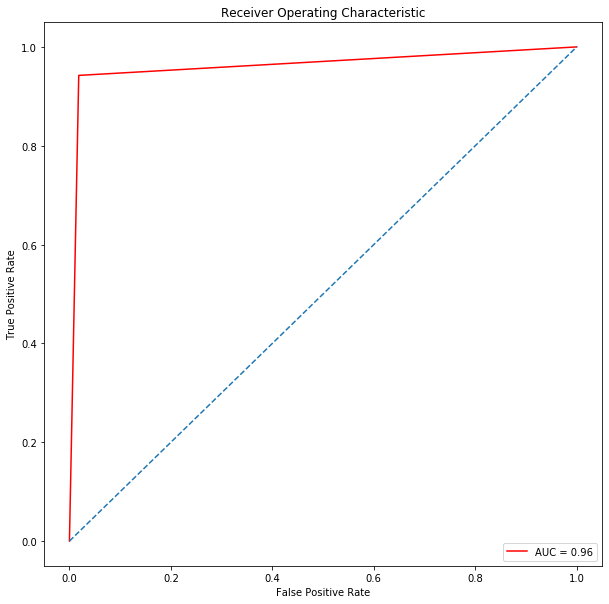

In [240]:
ROC(y_test, predictions)